<a href="https://colab.research.google.com/github/lilythomson13/hedonic_pricing/blob/main/hedonic_pricing_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/airbnb_hw.csv'

df = pd.read_csv(file_path)

print(df.head())

Mounted at /content/drive
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Revi

In [4]:
#QUESTION 1

#Clean Price
print(df['Price'].dtype)  # Should be 'float64' or 'int64'

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '', regex=False)  # Remove commas
df['Price'] = df['Price'].str.strip()                        # Remove leading/trailing spaces
df['Price'] = df['Price'].str.replace('$', '', regex=False) # Remove dollar signs if present


df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print("NaN values in Price column:", df['Price'].isna().sum())
print(df['Price'].dtype)  # Should be 'float64' or 'int64'



object
NaN values in Price column: 0
int64


In [5]:
#Clean beds
df['Beds']=df['Beds'].fillna(1)
df.describe()


,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30478.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.528611,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.014327,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


In [6]:
print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [7]:

pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


<Axes: xlabel='Price', ylabel='Count'>

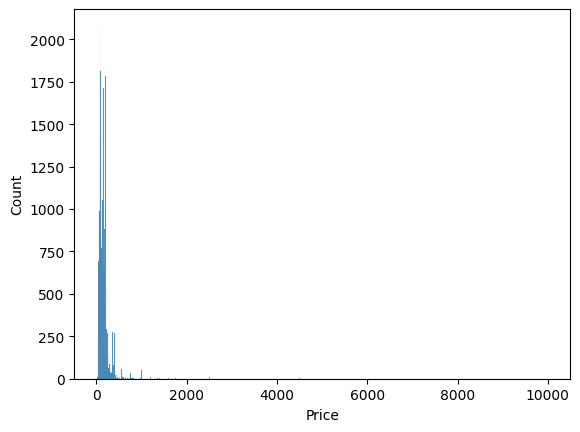

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

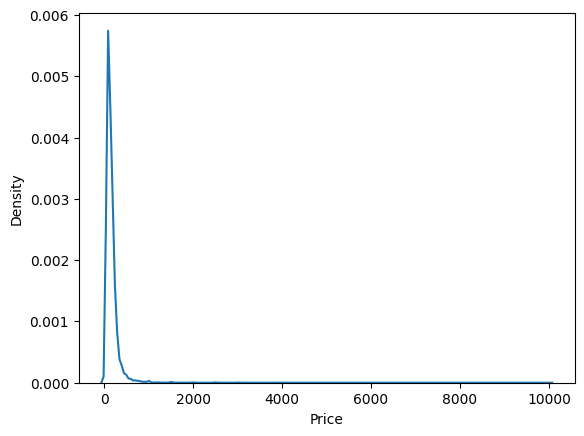

In [9]:

sns.kdeplot(data=df,x='Price')

<Axes: xlabel='Price'>

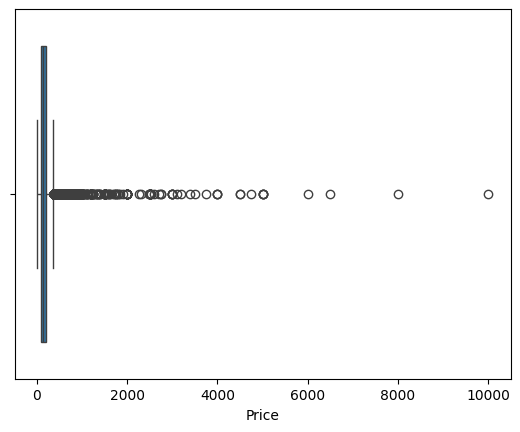

In [10]:
sns.boxplot(data=df,x='Price')

<Axes: xlabel='Price_log', ylabel='Count'>

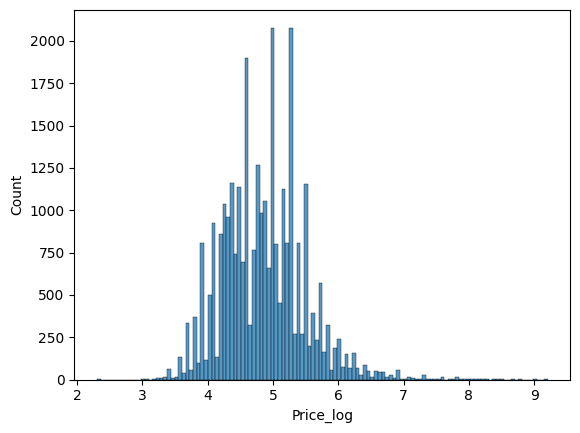

In [11]:
import numpy as np
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

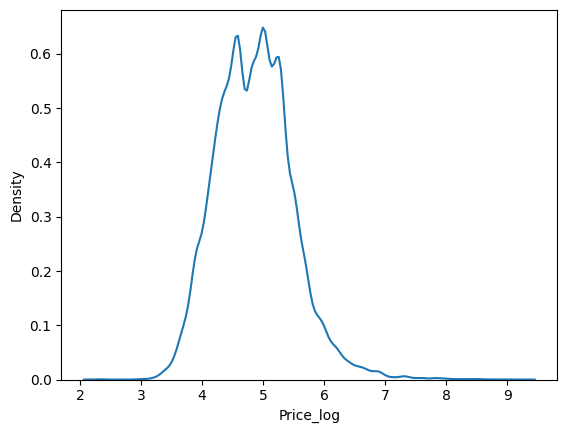

In [12]:

sns.kdeplot(data=df,x='Price_log')

<Axes: xlabel='Price_log'>

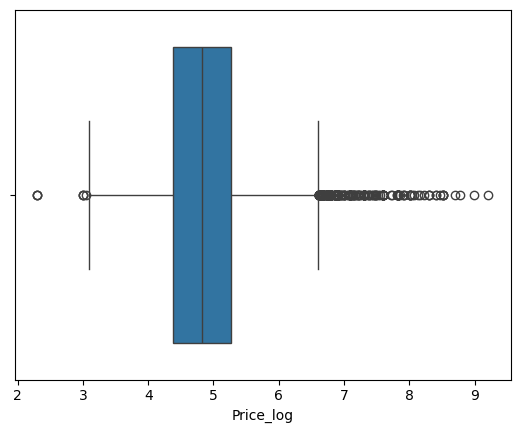

In [13]:

sns.boxplot(data=df,x='Price_log')

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

#QUESTION 2
y = df['Price']
X = df[['Neighbourhood ', 'Property Type']]

X = pd.get_dummies(X, drop_first=True)

#QUESTION 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#QUESTION 4
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)


print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R²: {train_r2}')
print(f'Test R²: {test_r2}')

Training RMSE: 184.45739609349658
Test RMSE: 225.89889497569416
Training R²: 0.044925839715937776
Test R²: 0.038599008518066635


The training RMSE is around 184.46 and the testing RMSE is around 225.89. This shows that the training set has predictions that are closer to the actually observed values. The r^2 value for the testing set is smaller than the training set which means that there is a smaller proportion of variance in the dependent variable.

In [17]:
#QUESTION 5

from sklearn.preprocessing import PolynomialFeatures

y = df['Price']
X = df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']]

X = pd.get_dummies(X, drop_first=True)

X = X.dropna()
y = y[X.index]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=100)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Training RMSE: {train_rmse}, Training R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

Training RMSE: 146.43919319871085, Training R²: 0.06687858502104604
Test RMSE: 131.25607363528607, Test R²: 0.08511243311489647


Given that the training set RMSE and testing set RMSE is lower in the polynomial model than in the simple model and having higher R^2 values in both cases, we can see that the polynomial model performs better predicting values. In this case, I used a power of 2 in the polynomial. I didn't want to use a higher power to risk overfitting the model, which will perform well in the testing set, but not in the training set.